# **Salary Range Classification**

For Classification of Salary range, we will use following algorithms:

1. Logistic Regression

2. Decision Tree Classifier

3. Naive Bayes

4. Random Forest Classifier

By using the above algorithms, we will firstly explore the data that we have and check for any null or missing values. If found then we'll clean tha data and then visualize it for better understanding.Then we'll proceed by data training i.e. spliting data into training and testing data.Then initialize the classifier and train our model by providing training data and once the model will be trained, we will perform prediction for the test data. At last, we will evaluate the performance of these algorithmns by error check and accuracy check.

Steps followed are as:

Step 1: Data Exploration

Step 2: Data Visualization

Step 3: Data Training

Step 4: Model Creation

Step 5: Performance Evaluation

For the dataset being used in this project  [ click here ](https://www.kaggle.com/balakrishcodes/others?select=salaries.csv)

## Data Exploration

In [119]:
import pandas as pd

In [120]:
data=pd.read_csv('/content/salaries.csv')
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [121]:
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [122]:
data.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [123]:
data.shape

(16, 4)

In [124]:
data.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [126]:
data.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

The dataset being used is cleaned, therefore no data cleaning is required.

## Data Visualization

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


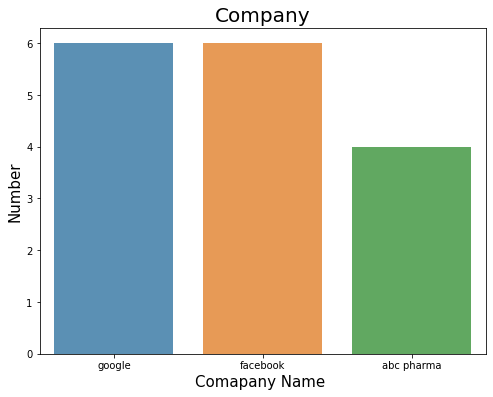

In [128]:
count=data['company'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Company", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Comapany Name ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Company')

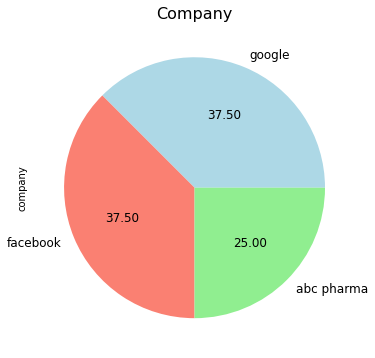

In [129]:
data['company'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightblue','salmon','lightgreen'])
plt.title("Company",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


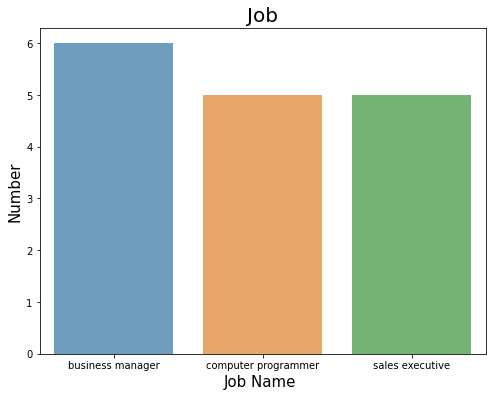

In [130]:
count=data['job'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.title("Job", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Job Name ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Job')

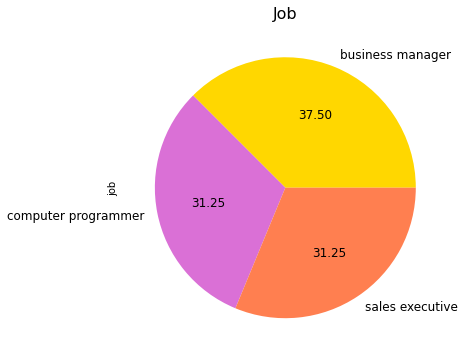

In [131]:
data['job'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['gold','orchid','coral'])
plt.title("Job",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


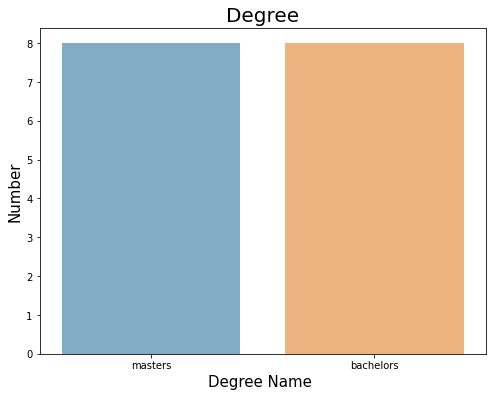

In [132]:
count=data['degree'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.title("Degree", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Degree Name ", fontsize=15)
plt.show()

## Data Training

In [133]:
columns=['company','job','degree']
data1=data[columns]
dummies=pd.get_dummies(data1,columns=['company','job','degree'])
dummies
#convert categorical into numerical data.

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,1
6,1,0,0,0,0,1,0,1
7,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,1,0
9,1,0,0,1,0,0,0,1


In [134]:
#merging data and numerical columns
mergeddata= pd.concat([data,dummies],axis='columns')
mergeddata

,company,job,degree,salary_more_then_100k,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,google,sales executive,bachelors,0,0,0,1,0,0,1,1,0
1,google,sales executive,masters,0,0,0,1,0,0,1,0,1
2,google,business manager,bachelors,1,0,0,1,1,0,0,1,0
3,google,business manager,masters,1,0,0,1,1,0,0,0,1
4,google,computer programmer,bachelors,0,0,0,1,0,1,0,1,0
5,google,computer programmer,masters,1,0,0,1,0,1,0,0,1
6,abc pharma,sales executive,masters,0,1,0,0,0,0,1,0,1
7,abc pharma,computer programmer,bachelors,0,1,0,0,0,1,0,1,0
8,abc pharma,business manager,bachelors,0,1,0,0,1,0,0,1,0
9,abc pharma,business manager,masters,1,1,0,0,1,0,0,0,1


In [135]:
#Prepared data 
prepareddata=mergeddata.drop(['company','job','degree'],axis='columns')
prepareddata

,salary_more_then_100k,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,0,1,0,0,1,1,0
1,0,0,0,1,0,0,1,0,1
2,1,0,0,1,1,0,0,1,0
3,1,0,0,1,1,0,0,0,1
4,0,0,0,1,0,1,0,1,0
5,1,0,0,1,0,1,0,0,1
6,0,1,0,0,0,0,1,0,1
7,0,1,0,0,0,1,0,1,0
8,0,1,0,0,1,0,0,1,0
9,1,1,0,0,1,0,0,0,1


In [136]:
prepareddata.columns

Index(['salary_more_then_100k', 'company_abc pharma', 'company_facebook',
       'company_google', 'job_business manager', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters'],
      dtype='object')

In [137]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_more_then_100k    16 non-null     int64
 1   company_abc pharma       16 non-null     uint8
 2   company_facebook         16 non-null     uint8
 3   company_google           16 non-null     uint8
 4   job_business manager     16 non-null     uint8
 5   job_computer programmer  16 non-null     uint8
 6   job_sales executive      16 non-null     uint8
 7   degree_bachelors         16 non-null     uint8
 8   degree_masters           16 non-null     uint8
dtypes: int64(1), uint8(8)
memory usage: 384.0 bytes


In [138]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features that affect salary classification and y will have our target Salary.
x=prepareddata[['company_abc pharma', 'company_facebook','company_google', 'job_business manager', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters']]  
y=prepareddata['salary_more_then_100k']

In [139]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
#Ratio used for splitting training and testing data is 8:2 respectively

## Model Creation

Logistic Regression

In [143]:
# Importing logistic regression model
from sklearn.linear_model import LogisticRegression 
clfr1 = LogisticRegression()

In [144]:
# Fitting data into the model.
clfr1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
# Making predictions 
pred1 = clfr1.predict(x_test)

In [146]:
pred1

array([1, 1, 1, 1])

In [147]:
print("Accuracy of the Logistic Regression model comes to be: \n ") 
print(clfr1.score(x_train,y_train))

Accuracy of the Logistic Regression model comes to be: 
 
0.8333333333333334


Decision Tree Classifier

In [148]:
# Importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
clfr2 = DecisionTreeClassifier()

In [149]:
#Fitting data into the model.
clfr2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
# Making predictions 
pred2 = clfr2.predict(x_test)

In [151]:
pred2

array([0, 1, 0, 1])

In [152]:
print("Accuracy of the Decision Tree Classifier model comes to be: \n ") 
print(clfr2.score(x_train,y_train))

Accuracy of the Decision Tree Classifier model comes to be: 
 
1.0


Naive Bayes 

In [153]:
# Importing naive bayes 
from sklearn.naive_bayes import GaussianNB
clfr3 = GaussianNB()

In [154]:
#Fitting data into the model.
clfr3.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [155]:
# Making predictions 
pred3 = clfr3.predict(x_test)

In [156]:
pred3

array([0, 0, 0, 0])

In [157]:
print("Accuracy of the Naive Bayes model comes to be: \n ") 
print(clfr3.score(x_train,y_train))

Accuracy of the Naive Bayes model comes to be: 
 
0.9166666666666666


Random Forest Classifier

In [158]:
# Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
clfr4 =RandomForestClassifier(n_estimators=70)

In [159]:
#Fitting data into the model.
clfr4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [160]:
# Making predictions 
pred4 = clfr4.predict(x_test)

In [161]:
pred4

array([1, 1, 1, 1])

In [162]:
print("Accuracy of the Random Forest Classifier model comes to be: \n ") 
print(clfr4.score(x_train,y_train))

Accuracy of the Random Forest Classifier model comes to be: 
 
1.0


## Performance Check

In [163]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t    RootMeanSquareError   \t\t   Accuracy of the model") 
print("""Logistic Regression      \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), clfr1.score(x_train,y_train)))
print("""Decision Tree Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), clfr2.score(x_train,y_train)))
print("""Naive Bayes              \t\t {:.4f}  \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), clfr3.score(x_train,y_train)))
print("""Random Forest Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), clfr4.score(x_train,y_train)))

Model			    RootMeanSquareError   		   Accuracy of the model
Logistic Regression      		 0.8660 	 		 0.8333
Decision Tree Classifier 		 0.8660 	 		 1.0000
Naive Bayes              		 0.5000  	 		 0.9167
Random Forest Classifier 		 0.8660 	 		 1.0000


Conclusion:

Decision tree classifier and random forest classifier have best accuracy when compared to that of logistic regression and naive bayes.